## RideTrack 基本資訊

### 系統的主要功能與目的
RideTrack專注於主動式機車駕駛行為追蹤。該方法基於IMU（Inertial Measurement Unit）和ECU（Engine Control Unit）的感測數據，並不使用影像資料。這樣不僅能預測和辨識機車駕駛行為，還能在保護駕駛隱私的前提下實現。

### 開發團隊
本系統由 **NCHU KDD 721** 團隊負責開發。

### API 介紹
RideTrack系統主要包含以下模組：

- **SensorFusion**：用於感測器數據的融合與預處理。
- **AutoTag Integrator**：底層動作的自動標記。
- **DrivePSTs**：用於處理駕駛上層行為的模型。
- **LiveStreamer**：負責即時數據串流處理。
- **ActionPulse Predictor**：負責行為預測。


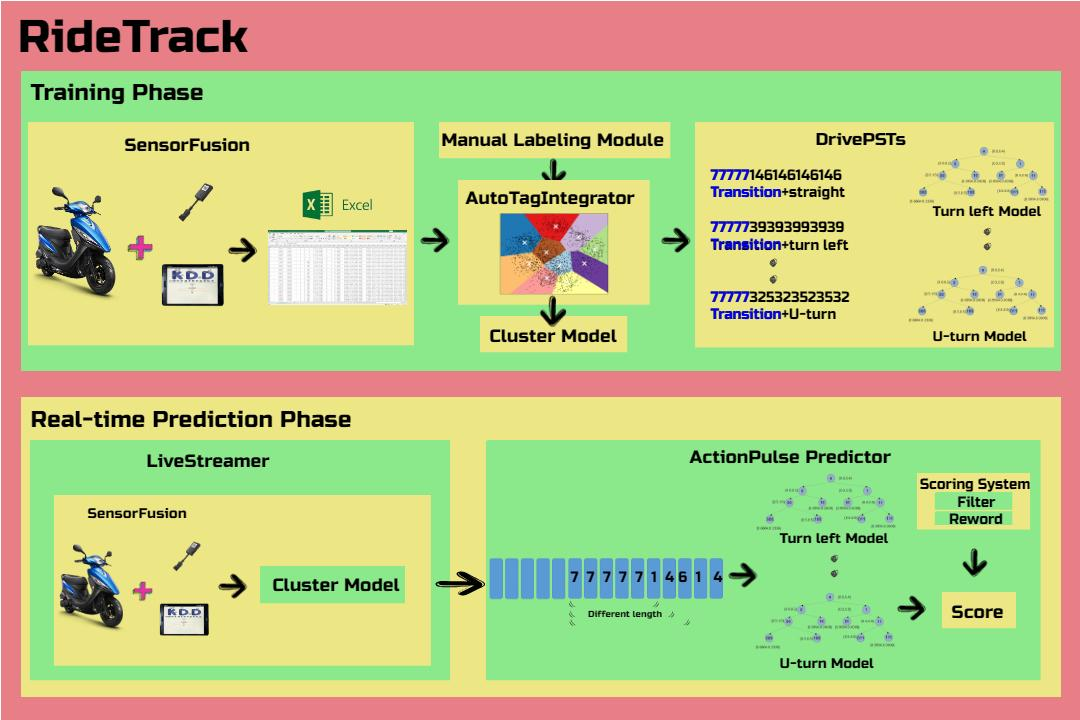

## 資料集詳情

### 基本信息

- **時間**：2023-04-17 14:16分
  - 說明：這是開始收集資料的時間。
  - 特點：非尖峰時刻，交通順暢車流量與人流較少。

- **駕駛**：William
  - 說明：這是負責這次實驗的駕駛者，駕駛風格平穩。

- **地點**：學區附近
  - 說明：這次的實驗是在學區附近進行的，交通順暢車流量與人流較少，紅綠燈數量較多。

### 資料收集

- **取樣頻率**：30次/秒
  - 說明：這意味著每秒鐘收集了30筆資料，這是一個相當高的取樣頻率，可以捕捉到細節的駕駛情況。

- **資料筆數**：27577筆
  - 說明：這是這次實驗中總共收集的資料筆數。

- **使用時間**：14:16:18 - 14:41:25
  - 說明：這是資料收集的起始和結束時間，總共約25分鐘。

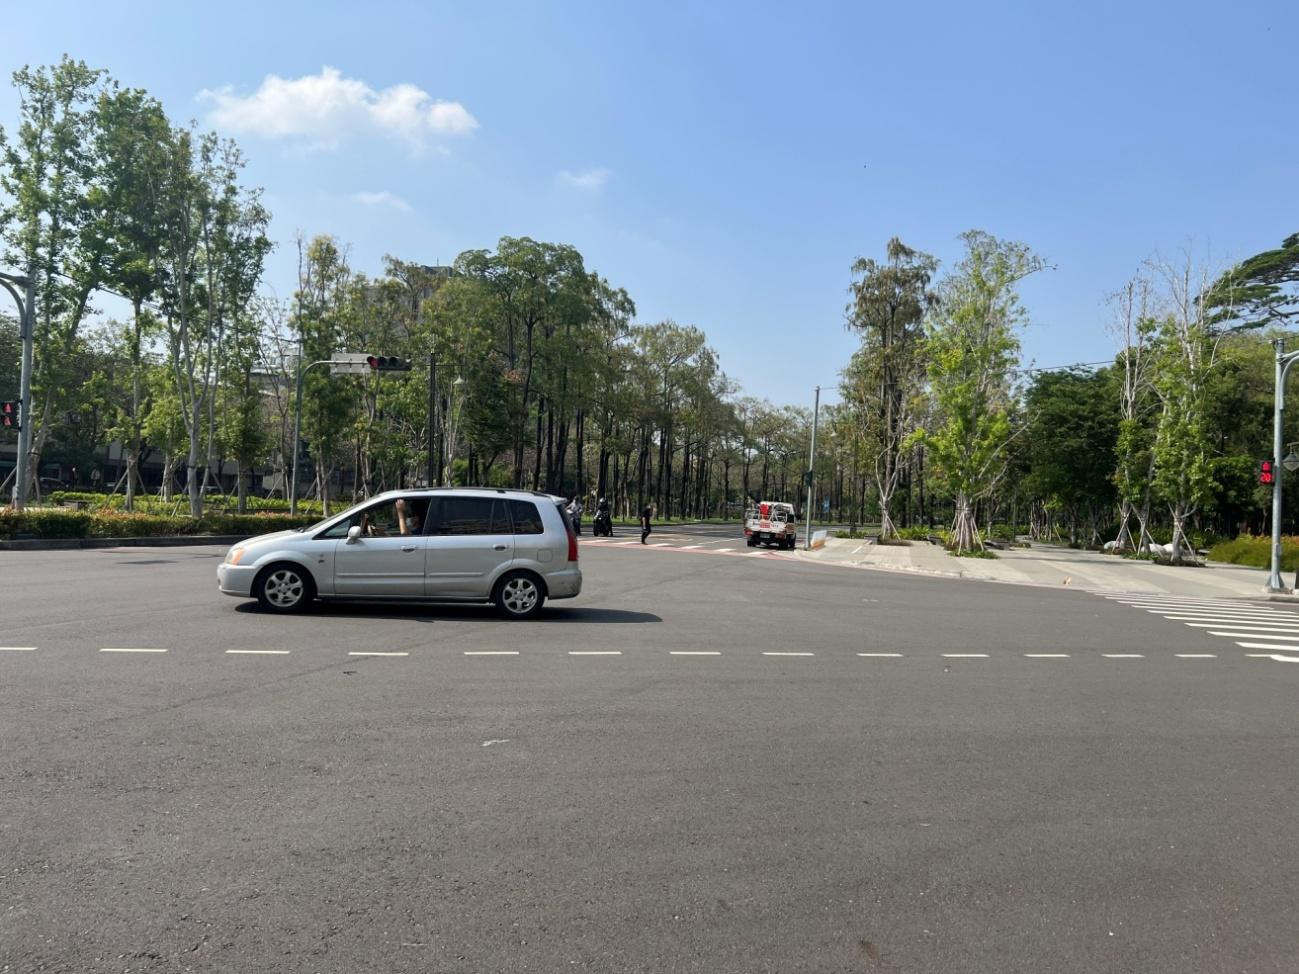

In [26]:
import pandas as pd
import Ridetrack

In [27]:
SensorFusion = Ridetrack.SensorFusion()
SensorFusion.Introduction()



       ╔═╗ ╔╦═══╦╗ ╔╦╗ ╔╗╔═══╦═══╗╔╗╔═╦═══╦═══╦═══╦═══╗╔╗
       ║║╚╗║║╔═╗║║ ║║║ ║║║╔══╣╔══╝║║║╔╩╗╔╗╠╗╔╗║╔═╗║╔═╗╠╝║
       ║╔╗╚╝║║ ╚╣╚═╝║║ ║║║╚══╣╚══╗║╚╝╝ ║║║║║║║╠╝╔╝╠╝╔╝╠╗║
       ║║╚╗║║║ ╔╣╔═╗║║ ║║║╔══╣╔══╝║╔╗║ ║║║║║║║║ ║╔╬═╝╔╝║║
       ║║ ║║║╚═╝║║ ║║╚═╝║║╚══╣╚══╗║║║╚╦╝╚╝╠╝╚╝║ ║║║║╚═╦╝╚╗
       ╚╝ ╚═╩═══╩╝ ╚╩═══╝╚═══╩═══╝╚╝╚═╩═══╩═══╝ ╚╝╚═══╩══╝
                  ╔═══╗  ╔╗  ╔════╗       ╔╗
                  ║╔═╗║  ║║  ║╔╗╔╗║       ║║
                  ║╚═╝╠╦═╝╠══╬╝║║╚╬═╦══╦══╣║╔╗
                  ║╔╗╔╬╣╔╗║║═╣ ║║ ║╔╣╔╗║╔═╣╚╝╝
                  ║║║╚╣║╚╝║║═╣ ║║ ║║║╔╗║╚═╣╔╗╗
                  ╚╝╚═╩╩══╩══╝ ╚╝ ╚╝╚╝╚╩══╩╝╚╝
              ╔═══╗             ╔═══╗
              ║╔═╗║             ║╔══╝
              ║╚══╦══╦═╗╔══╦══╦═╣╚══╦╗╔╦══╦╦══╦═╗
              ╚══╗║║═╣╔╗╣══╣╔╗║╔╣╔══╣║║║══╬╣╔╗║╔╗╗
              ║╚═╝║║═╣║║╠══║╚╝║║║║  ║╚╝╠══║║╚╝║║║║
              ╚═══╩══╩╝╚╩══╩══╩╝╚╝  ╚══╩══╩╩══╩╝╚╝

        歡迎使用 RideTrack SensorFusion 功能！
        
        這個Class包含以下功能：
        
        1

In [28]:
# 1.School_District_Axis_User1.txt 為平板所收到的IMU的RawData
# 2.School_District_ECU_User1.txt  為APP所收到ECU的RawData

In [29]:
# 處理IMU的RawData，轉成可以使用的.csv檔案
SensorFusion.Axis_Process('1.School_District_Axis_User1.txt', '1.School_District_Axis_User1.csv')

# 處理ECU的RawData，轉成可以使用的.csv檔案
SensorFusion.ECU_Reverse('2.School_District_ECU_User1.txt', '2.School_District_ECU_User1.csv')

# 對齊 IMU 與 ECU 成為可以使用的資料集
SensorFusion.Data_Merge('2.School_District_ECU_User1.csv', '1.School_District_Axis_User1.csv',  'School_District_User1.csv')

#校正歸零角度
df = pd.read_csv('School_District_User1.csv')
SensorFusion.calibrate_angles(df, 'School_District_User1.csv')

#校正歸角速度  (K依每次開始前機車靜置校正不同有所改變)
df = pd.read_csv('School_District_User1.csv')
SensorFusion.calibrate_imu(df, 1270, 'School_District_User1.csv')

df.columns


Reading 3-axis data in part1 (1/2)


100%|██████████| 28585/28585 [00:05<00:00, 4875.94it/s]



Reading sampling time in part2 (2/2)


100%|██████████| 28584/28584 [00:10<00:00, 2621.40it/s]


Execution time: 0.0 hours 0.0 minutes 21.09171175956726 seconds

【Reverse Engineering Restores ECU Data Part 1 (1/2)】


100%|██████████| 3350/3350 [00:07<00:00, 429.48it/s]



【Reverse Engineering Restores ECU Data Part 2 (2/2)】


100%|██████████| 3350/3350 [00:07<00:00, 440.79it/s]


Execution time: 0.0 hours 0.0 minutes 15.491124153137207 seconds

【Data Engineering Megre Data Part 1 (1/2)】


100%|██████████| 3349/3349 [00:02<00:00, 1235.98it/s]



【Data Engineering Megre Data Part 2 (2/2)】


100%|██████████| 3349/3349 [00:05<00:00, 638.49it/s]


Execution time: 0.0 hours 0.0 minutes 11.068345308303833 seconds


100%|██████████| 27577/27577 [00:00<00:00, 550965.17it/s]


Execution time: 0.0 hours 0.0 minutes 0.6153891086578369 seconds
Execution time: 0.0 hours 0.0 minutes 0.6007661819458008 seconds


Index(['Unnamed: 0', 'Unnamed: 0.1', 'ECU Absolute Time',
       'Atmospheric Pressure', 'Inclination Switch', 'Fault Code Count',
       'Ignition Coil Current Diagnosis', 'Fault Light Mileage',
       'Engine Operating Time', 'Ignition Advance Angle',
       'Idling Correction Ignition Angle', 'Fuel Injection Prohibition Mode',
       'Injection Mode', 'Bypass Delay Correction', 'ABV Opening',
       'ABV Idling Correction', 'ABV Learning Value', 'Lambda Setting',
       'Air-Fuel Ratio Rich', 'Closed Loop Control', 'Air Flow',
       'Throttle Valve Air Flow', 'Intake Manifold Pressure',
       'Intake Manifold Front Pressure', 'MFF_AD_ADD_MMV_REL',
       'MFF_AD_FAC_MMV_REL', 'MFF_AD_ADD_MMV', 'MFF_AD_FAC_MMV',
       'Fuel Injection Quantity', 'MFF_WUP_COR', 'Ignition Mode', 'Engine RPM',
       'Engine RPM Limit', 'Idling Target RPM', 'Fuel Injection Start Angle',
       'Fuel Pump State', 'Engine State', 'Engine Temperature',
       'Water Temperature PWM', 'Ignition Magnetizat

In [30]:
# 由於絕對時間無法正規化，所以我這邊先把ECU時間與IMU時間拿掉，也順便把'Unnamed:'資料處理完產生的Index拿掉。
df = pd.read_csv('School_District_User1.csv')
print(df.columns)
df = df.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'ECU Absolute Time', 'Absolute Time'], axis=1)

# 正規化
SensorFusion.normalize_data(df, df.columns, method="minmax", save_path='School_District_User1.csv')

# 卡爾曼濾波器(https://pypi.org/project/filterpy/)
df = pd.read_csv('School_District_User1.csv')
SensorFusion.apply_kalman_filter(df, df.columns,  q_noise=0.0001, r_noise=0.001, save_path='School_District_User1.csv')

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'ECU Absolute Time',
       'Atmospheric Pressure', 'Inclination Switch', 'Fault Code Count',
       'Ignition Coil Current Diagnosis', 'Fault Light Mileage',
       'Engine Operating Time', 'Ignition Advance Angle',
       'Idling Correction Ignition Angle', 'Fuel Injection Prohibition Mode',
       'Injection Mode', 'Bypass Delay Correction', 'ABV Opening',
       'ABV Idling Correction', 'ABV Learning Value', 'Lambda Setting',
       'Air-Fuel Ratio Rich', 'Closed Loop Control', 'Air Flow',
       'Throttle Valve Air Flow', 'Intake Manifold Pressure',
       'Intake Manifold Front Pressure', 'MFF_AD_ADD_MMV_REL',
       'MFF_AD_FAC_MMV_REL', 'MFF_AD_ADD_MMV', 'MFF_AD_FAC_MMV',
       'Fuel Injection Quantity', 'MFF_WUP_COR', 'Ignition Mode', 'Engine RPM',
       'Engine RPM Limit', 'Idling Target RPM', 'Fuel Injection Start Angle',
       'Fuel Pump State', 'Engine State', 'Engine Temperature',
       'Water Temperature PWM', 'I

100%|██████████| 27577/27577 [00:14<00:00, 1899.21it/s]


Execution time: 0.0 hours 0.0 minutes 15.342710971832275 seconds


,Unnamed: 0,Atmospheric Pressure,Inclination Switch,Fault Code Count,Ignition Coil Current Diagnosis,Fault Light Mileage,Engine Operating Time,Ignition Advance Angle,Idling Correction Ignition Angle,Fuel Injection Prohibition Mode,...,Seat Switch State,X-axis Angular Velocity,Y-axis Angular Velocity,Z-axis Angular Velocity,X-axis Acceleration,Y-axis Acceleration,Z-axis Acceleration,X-axis Angle,Y-axis Angle,Z-axis Angle
0,0.000000,0.856287,0.0,0.0,0.732601,0.0,0.0,0.154607,0.499501,0.000000e+00,...,0.0,0.585389,0.557466,0.423860,0.418497,0.499827,0.586805,0.856582,0.804416,0.610468
1,0.523583,0.856735,0.0,0.0,0.732984,0.0,0.0,0.154688,0.499762,0.000000e+00,...,0.0,0.587924,0.563415,0.422855,0.446080,0.480768,0.581916,0.854078,0.782741,0.566333
2,1.090643,0.856892,0.0,0.0,0.733118,0.0,0.0,0.154717,0.499853,0.000000e+00,...,0.0,0.594108,0.568457,0.423045,0.440398,0.516152,0.596032,0.847099,0.809858,0.626548
3,1.713439,0.856974,0.0,0.0,0.733188,0.0,0.0,0.154731,0.499901,0.000000e+00,...,0.0,0.585572,0.562436,0.422992,0.445000,0.507666,0.589998,0.849089,0.804128,0.613263
4,2.396725,0.857024,0.0,0.0,0.733232,0.0,0.0,0.154740,0.499931,0.000000e+00,...,0.0,0.591404,0.562317,0.422818,0.437741,0.509997,0.585716,0.851352,0.807050,0.619822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27572,27569.298438,0.785714,0.0,0.0,0.750848,0.0,1.0,0.135078,0.472774,6.308880e-10,...,0.0,0.579123,0.560942,0.421437,0.429971,0.515772,0.590172,0.872407,0.814268,0.632362
27573,27570.298438,0.785714,0.0,0.0,0.746116,0.0,1.0,0.137180,0.480129,4.604497e-10,...,0.0,0.592735,0.562823,0.421194,0.410613,0.516043,0.593738,0.874835,0.814023,0.632255
27574,27571.298438,0.785714,0.0,0.0,0.742663,0.0,1.0,0.138714,0.485497,3.360564e-10,...,0.0,0.581160,0.564278,0.420890,0.420146,0.516753,0.592643,0.873130,0.815161,0.634689
27575,27572.298438,0.785714,0.0,0.0,0.740143,0.0,1.0,0.139833,0.489415,2.452687e-10,...,0.0,0.603970,0.565507,0.420921,0.414703,0.519296,0.591702,0.873898,0.816046,0.638088


In [31]:
# 這邊簡單做個範例 (使用IMU9軸資料)，後面會說明為什麼以9軸為範例。
df = pd.read_csv('School_District_User1.csv')


feature = ['X-axis Angular Velocity', 'Y-axis Angular Velocity',
       'Z-axis Angular Velocity', 'X-axis Acceleration', 'Y-axis Acceleration',
       'Z-axis Acceleration', 'X-axis Angle', 'Y-axis Angle', 'Z-axis Angle']

# 使用PCA ，在保留變異比95%的情況下，討論資料需要留幾個特徵。
SensorFusion.apply_pca(df[feature],  n_components=None, save_model=None)

# 單純使用IMU資訊作範例，是因為IMU已經可以預測60%~70%的準確度了
# 加上為了讓大家更聊解成是如何使用，一開始使用太多維的資料也比較容易混淆。 

適合降至6維度
Execution time: 0.0 hours 0.0 minutes 0.01444387435913086 seconds


(array([[-0.04884711, -0.0109548 , -0.01668647,  0.01190693,  0.00178021,
         -0.01343875],
        [ 0.0056601 , -0.01989711, -0.02662257,  0.02192206, -0.01047083,
         -0.00378555],
        [-0.05800728, -0.01921752,  0.00454423, -0.00063654, -0.01864558,
         -0.0083687 ],
        ...,
        [-0.07593539, -0.00843289, -0.01534843,  0.00229777, -0.01228593,
         -0.02961897],
        [-0.08185193, -0.02380046, -0.00344108,  0.01278208, -0.00723845,
         -0.0343826 ],
        [-0.08023441, -0.00955048, -0.01077067,  0.00153174, -0.01448949,
         -0.029617  ]]),
 PCA(n_components=6))

In [32]:
# 這邊簡單做個範例把ECU+IMU所有資訊直接做PCA，會發現建議只需要1個特徵 (如下)
# 因為ECU中有太多無用的特徵了(數值從頭到尾都沒有變化過)，這樣會影響PCA計算出來的建議特徵數量
# 先去除ECU中沒有變化的特徵，再加上IMU特徵，在做PCA (本實驗建議特徵為10)，大家可以自己試試看。

df = pd.read_csv('School_District_User1.csv')

print(df.columns) 

SensorFusion.apply_pca(df[df.columns],  n_components=None, save_model=None)

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Atmospheric Pressure',
       'Inclination Switch', 'Fault Code Count',
       'Ignition Coil Current Diagnosis', 'Fault Light Mileage',
       'Engine Operating Time', 'Ignition Advance Angle',
       'Idling Correction Ignition Angle', 'Fuel Injection Prohibition Mode',
       'Injection Mode', 'Bypass Delay Correction', 'ABV Opening',
       'ABV Idling Correction', 'ABV Learning Value', 'Lambda Setting',
       'Air-Fuel Ratio Rich', 'Closed Loop Control', 'Air Flow',
       'Throttle Valve Air Flow', 'Intake Manifold Pressure',
       'Intake Manifold Front Pressure', 'MFF_AD_ADD_MMV_REL',
       'MFF_AD_FAC_MMV_REL', 'MFF_AD_ADD_MMV', 'MFF_AD_FAC_MMV',
       'Fuel Injection Quantity', 'MFF_WUP_COR', 'Ignition Mode', 'Engine RPM',
       'Engine RPM Limit', 'Idling Target RPM', 'Fuel Injection Start Angle',
       'Fuel Pump State', 'Engine State', 'Engine Temperature',
       'Water Temperature PWM', 'Ignition Magnetization Time',
       'Fu

(array([[-19497.26666648],
        [-19496.18933075],
        [-19495.0812521 ],
        ...,
        [ 19496.34786599],
        [ 19497.76207955],
        [ 19499.17629311]]),
 PCA(n_components=1))

In [33]:
# 這裡一樣使用 9軸 IMU的資訊，展示給大家看。
df = pd.read_csv('Train_Label.csv')

feature = ['X-axis Angular Velocity', 'Y-axis Angular Velocity',
       'Z-axis Angular Velocity', 'X-axis Acceleration', 'Y-axis Acceleration',
       'Z-axis Acceleration', 'X-axis Angle', 'Y-axis Angle', 'Z-axis Angle']

SensorFusion.feature_importance(df[feature], df['Action'])

# 展現出3種挑重要特徵的方法，分別為隨機森林、XGB、PCA
# 我有Sort過會從銓重高的排到低的，方便觀察。

(              Feature_Name  RF_Importance
 2  Z-axis Angular Velocity       0.157383
 6             X-axis Angle       0.152662
 0  X-axis Angular Velocity       0.111171
 1  Y-axis Angular Velocity       0.110988
 3      X-axis Acceleration       0.101698
 5      Z-axis Acceleration       0.097631
 4      Y-axis Acceleration       0.093982
 7             Y-axis Angle       0.087996
 8             Z-axis Angle       0.086490,
               Feature_Name  XGB_Importance
 2  Z-axis Angular Velocity        0.268847
 6             X-axis Angle        0.144852
 8             Z-axis Angle        0.097164
 1  Y-axis Angular Velocity        0.090149
 4      Y-axis Acceleration        0.084139
 0  X-axis Angular Velocity        0.083295
 3      X-axis Acceleration        0.081992
 5      Z-axis Acceleration        0.076484
 7             Y-axis Angle        0.073078,
               Feature_Name  PCA_Importance
 8             Z-axis Angle        0.248745
 7             Y-axis Angle        0.221

In [34]:
import pandas as pd
import Ridetrack
AutoTag = Ridetrack.AutoTag()

In [35]:
AutoTag.Introduction()



       ╔═╗ ╔╦═══╦╗ ╔╦╗ ╔╗╔═══╦═══╗╔╗╔═╦═══╦═══╦═══╦═══╗╔╗
       ║║╚╗║║╔═╗║║ ║║║ ║║║╔══╣╔══╝║║║╔╩╗╔╗╠╗╔╗║╔═╗║╔═╗╠╝║
       ║╔╗╚╝║║ ╚╣╚═╝║║ ║║║╚══╣╚══╗║╚╝╝ ║║║║║║║╠╝╔╝╠╝╔╝╠╗║
       ║║╚╗║║║ ╔╣╔═╗║║ ║║║╔══╣╔══╝║╔╗║ ║║║║║║║║ ║╔╬═╝╔╝║║
       ║║ ║║║╚═╝║║ ║║╚═╝║║╚══╣╚══╗║║║╚╦╝╚╝╠╝╚╝║ ║║║║╚═╦╝╚╗
       ╚╝ ╚═╩═══╩╝ ╚╩═══╝╚═══╩═══╝╚╝╚═╩═══╩═══╝ ╚╝╚═══╩══╝
                  ╔═══╗  ╔╗  ╔════╗       ╔╗
                  ║╔═╗║  ║║  ║╔╗╔╗║       ║║
                  ║╚═╝╠╦═╝╠══╬╝║║╚╬═╦══╦══╣║╔╗
                  ║╔╗╔╬╣╔╗║║═╣ ║║ ║╔╣╔╗║╔═╣╚╝╝
                  ║║║╚╣║╚╝║║═╣ ║║ ║║║╔╗║╚═╣╔╗╗
                  ╚╝╚═╩╩══╩══╝ ╚╝ ╚╝╚╝╚╩══╩╝╚╝
                    ╭━━━╮  ╭╮  ╭━━━━╮
                    ┃╭━╮┃ ╭╯╰╮ ┃╭╮╭╮┃
                    ┃┃ ┃┣╮┣╮╭╋━┻┫┃┃┣┻━┳━━╮
                    ┃╰━╯┃┃┃┃┃┃╭╮┃┃┃┃╭╮┃╭╮┃
                    ┃╭━╮┃╰╯┃╰┫╰╯┃┃┃┃╭╮┃╰╯┃
                    ╰╯ ╰┻━━┻━┻━━╯╰╯╰╯╰┻━╮┃
                                      ╭━╯┃
                                      ╰━━╯

        歡迎使用 RideTrack AutoTag 功能！


100%|██████████| 19/19 [00:09<00:00,  2.04it/s]

根據 Silhouette Score，前 10 個建議的分群數量分別為 [11  9 12  7  8  4  6  3  5  2]
根據 Calinski-Harabasz Index，前 10 個建議的分群數量分別為 [11 10  9  8  7  6  5  4  2  3]
根據 Davies-Bouldin Index，前 10 個建議的分群數量分別為 [15 10 18  9 16 14 11 20 13 19]
根據 Distortion，前 10 個建議的分群數量分別為 [20 19 18 17 16 15 14 13 12 11]
根據前三個評分標準推薦的分群數交集為 {9, 11}
Execution time: 0.0 hours 0.0 minutes 9.45182752609253 seconds


(    Silhouette Score  Calinski-Harabasz Index  Davies-Bouldin Index  \
 2           0.608007              2852.433475              0.723082   
 3           0.297132              2932.896760              1.045943   
 4           0.264523              2592.872923              1.142279   
 5           0.301734              2545.355025              0.996317   
 6           0.272215              2384.578678              1.063612   
 7           0.218769              2247.155373              1.241830   
 8           0.222650              2073.444262              1.253109   
 9           0.207268              1915.630483              1.323984   
 10          0.194138              1871.986750              1.316669   
 11          0.206878              1801.543823              1.356318   
 12          0.214667              1711.565386              1.277265   
 13          0.190514              1689.069112              1.362438   
 14          0.193913              1642.740688              1.33

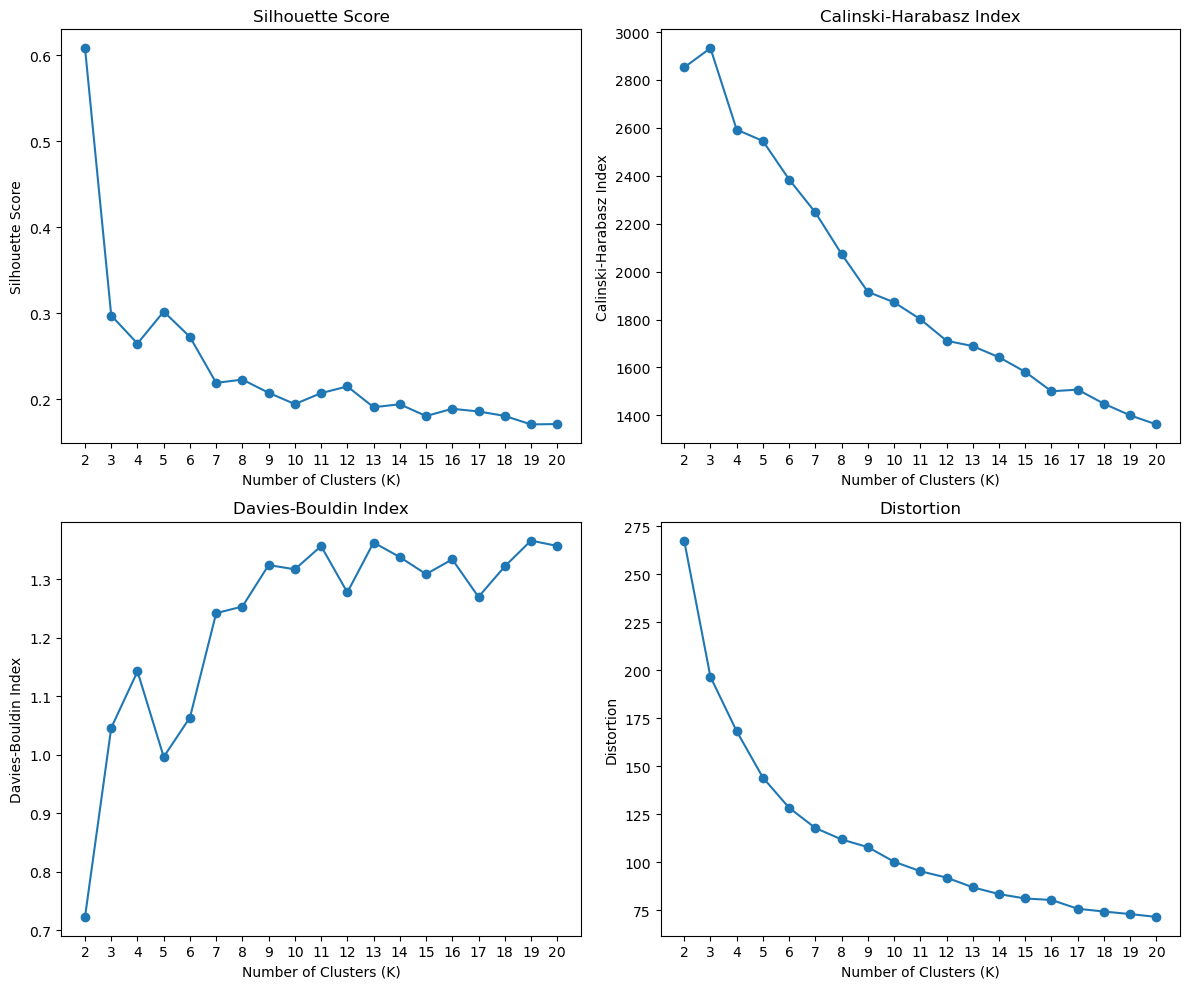

In [36]:
# 這裡一樣使用 9軸 IMU的資訊，展示給大家看。

df = pd.read_csv('Train_Label.csv')

feature = ['X-axis Angular Velocity', 'Y-axis Angular Velocity',
       'Z-axis Angular Velocity', 'X-axis Acceleration', 'Y-axis Acceleration',
       'Z-axis Acceleration', 'X-axis Angle', 'Y-axis Angle', 'Z-axis Angle']


# 找出最佳分群數 (這裡以最大20群為例探討)，不討論超過20群數
AutoTag.determine_optimal_clusters(df[feature], 20)

In [37]:
# 根據前三個評分標準推薦的分群數交集為 {9, 11}
# 以下範例以分11群示範
AutoTag.cluster_data(df[feature], feature, method="kmeans", n_clusters=11, model_path="Cluster11_model.pkl", save_path=False)

Execution time: 0.0 hours 0.0 minutes 0.4443342685699463 seconds


,X-axis Angular Velocity,Y-axis Angular Velocity,Z-axis Angular Velocity,X-axis Acceleration,Y-axis Acceleration,Z-axis Acceleration,X-axis Angle,Y-axis Angle,Z-axis Angle,Action Element
0,0.585974,0.558023,0.424284,0.418915,0.500327,0.587392,0.857438,0.805220,0.611079,9
1,0.565811,0.565432,0.424754,0.448767,0.487881,0.593090,0.851285,0.790531,0.584576,9
2,0.557311,0.565432,0.423821,0.471358,0.413567,0.575962,0.857123,0.750001,0.460816,7
3,0.576425,0.562966,0.419127,0.429404,0.518742,0.586344,0.851419,0.816661,0.641597,3
4,0.548826,0.571295,0.417723,0.428328,0.560885,0.636352,0.839079,0.848424,0.704576,3
...,...,...,...,...,...,...,...,...,...,...
5511,0.567940,0.562037,0.423351,0.416495,0.567727,0.602816,0.865247,0.842228,0.708008,3
5512,0.617830,0.566666,0.421940,0.371941,0.543271,0.589095,0.884636,0.821261,0.664095,3
5513,0.600845,0.559261,0.420537,0.381981,0.520562,0.560766,0.890635,0.813817,0.637228,1
5514,0.613588,0.563271,0.420067,0.399642,0.536138,0.595382,0.872199,0.823272,0.661077,3


In [38]:
import pandas as pd
import Ridetrack
DrivePSTs = Ridetrack.DrivePSTs()

In [39]:
DrivePSTs.Introduction()



       ╔═╗ ╔╦═══╦╗ ╔╦╗ ╔╗╔═══╦═══╗╔╗╔═╦═══╦═══╦═══╦═══╗╔╗
       ║║╚╗║║╔═╗║║ ║║║ ║║║╔══╣╔══╝║║║╔╩╗╔╗╠╗╔╗║╔═╗║╔═╗╠╝║
       ║╔╗╚╝║║ ╚╣╚═╝║║ ║║║╚══╣╚══╗║╚╝╝ ║║║║║║║╠╝╔╝╠╝╔╝╠╗║
       ║║╚╗║║║ ╔╣╔═╗║║ ║║║╔══╣╔══╝║╔╗║ ║║║║║║║║ ║╔╬═╝╔╝║║
       ║║ ║║║╚═╝║║ ║║╚═╝║║╚══╣╚══╗║║║╚╦╝╚╝╠╝╚╝║ ║║║║╚═╦╝╚╗
       ╚╝ ╚═╩═══╩╝ ╚╩═══╝╚═══╩═══╝╚╝╚═╩═══╩═══╝ ╚╝╚═══╩══╝
                  ╔═══╗  ╔╗  ╔════╗       ╔╗
                  ║╔═╗║  ║║  ║╔╗╔╗║       ║║
                  ║╚═╝╠╦═╝╠══╬╝║║╚╬═╦══╦══╣║╔╗
                  ║╔╗╔╬╣╔╗║║═╣ ║║ ║╔╣╔╗║╔═╣╚╝╝
                  ║║║╚╣║╚╝║║═╣ ║║ ║║║╔╗║╚═╣╔╗╗
                  ╚╝╚═╩╩══╩══╝ ╚╝ ╚╝╚╝╚╩══╩╝╚╝
                ╭━━━╮        ╭━━━┳━━━┳━━━━╮
                ╰╮╭╮┃        ┃╭━╮┃╭━╮┃╭╮╭╮┃
                 ┃┃┃┣━┳┳╮╭┳━━┫╰━╯┃╰━━╋╯┃┃┣┻━╮
                 ┃┃┃┃╭╋┫╰╯┃┃━┫╭━━┻━━╮┃ ┃┃┃━━┫
                ╭╯╰╯┃┃┃┣╮╭┫┃━┫┃  ┃╰━╯┃ ┃┃┣━━┃
                ╰━━━┻╯╰╯╰╯╰━━┻╯  ╰━━━╯ ╰╯╰━━╯

        歡迎使用 RideTrack DrivePSTs 功能！
        
        這個Class包含以下功能：
        
        1. train_vo

Execution time: 0.0 hours 0.0 minutes 0.5152707099914551 seconds
Execution time: 0.0 hours 0.0 minutes 3.040515899658203 seconds


100%|██████████| 5516/5516 [00:17<00:00, 313.16it/s]


Execution time: 0.0 hours 0.0 minutes 17.80403709411621 seconds
            index       Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  89.086595    14.912281   45.414847    42.5  33.050847   
1  Filter_Predict  94.661922    15.789474   53.711790    40.0  30.508475   

   Two-Stage Left  Accuracy (Total)  
0       59.016393         67.198468  
1       71.038251         72.559030  
| Action         |   Predicted: Go Straight |   Predicted: Idle |   Predicted: Turn Left |   Predicted: Turn Right |   Predicted: Two-Stage Left |   Predicted: U-turn |   Accuracy |
|:---------------|-------------------------:|------------------:|-----------------------:|------------------------:|----------------------------:|--------------------:|-----------:|
| Go Straight    |                       18 |                26 |                      0 |                      22 |                          27 |                  21 |    15.7895 |
| Idle           |                        0 |  

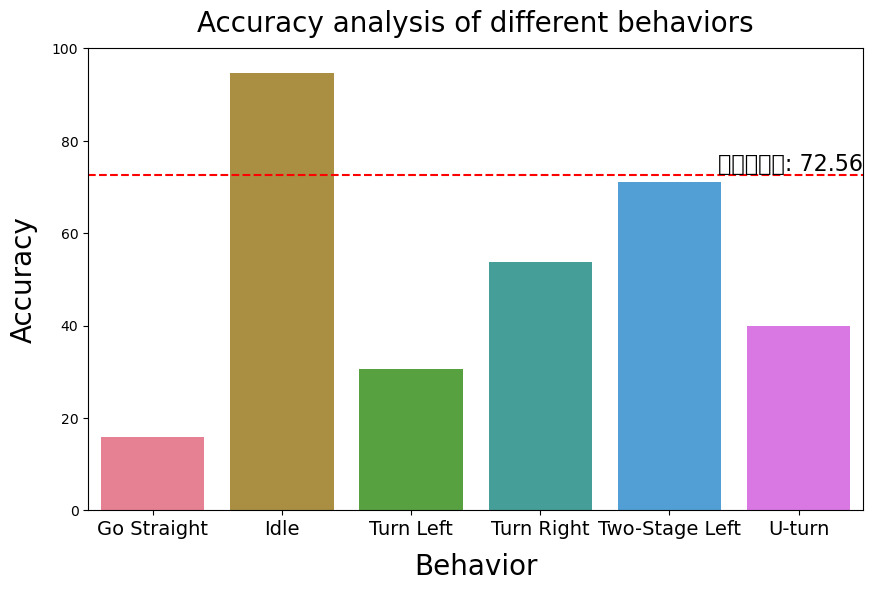

,Unnamed: 0,Atmospheric Pressure,Inclination Switch,Fault Code Count,Ignition Coil Current Diagnosis,Fault Light Mileage,Engine Operating Time,Ignition Advance Angle,Idling Correction Ignition Angle,Fuel Injection Prohibition Mode,...,X-axis Acceleration,Y-axis Acceleration,Z-axis Acceleration,X-axis Angle,Y-axis Angle,Z-axis Angle,Action Element,Action,Predict,Filter_Predict
0,0,0.857143,0,0,0.733333,0,0.0,0.154762,0.500000,0,...,0.418915,0.500327,0.587392,0.857438,0.805220,0.611079,0,Idle,Go Straight,Idle
1,1,0.857143,0,0,0.733333,0,0.0,0.154762,0.500000,0,...,0.448767,0.487881,0.593090,0.851285,0.790531,0.584576,0,Idle,Idle,Idle
2,2,0.857143,0,0,0.800000,0,0.0,0.130952,0.416667,0,...,0.471358,0.413567,0.575962,0.857123,0.750001,0.460816,9,Idle,Idle,Idle
3,3,0.857143,0,0,0.800000,0,0.0,0.130952,0.416667,0,...,0.429404,0.518742,0.586344,0.851419,0.816661,0.641597,5,Idle,Idle,Idle
4,4,0.857143,0,0,0.800000,0,0.0,0.154762,0.500000,0,...,0.428328,0.560885,0.636352,0.839079,0.848424,0.704576,5,Idle,Idle,Idle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5157,5157,0.571429,0,0,0.600000,0,1.0,0.142857,0.500000,0,...,0.271179,0.507169,0.566530,0.912521,0.811802,0.618883,2,Turn Right,Turn Right,Turn Right
5158,5158,0.571429,0,0,0.600000,0,1.0,0.142857,0.500000,0,...,0.282205,0.494868,0.590601,0.890136,0.810414,0.610510,2,Turn Right,Turn Right,Turn Right
5159,5159,0.571429,0,0,0.666667,0,1.0,0.154762,0.541667,0,...,0.384581,0.542616,0.605928,0.861320,0.824577,0.667240,5,Turn Right,Turn Right,Turn Right
5160,5160,0.571429,0,0,0.666667,0,1.0,0.154762,0.541667,0,...,0.494666,0.545600,0.587424,0.852823,0.871044,0.726679,8,Turn Right,Turn Right,Turn Right


In [40]:
# 使用剛剛分11群的作範例（載入模型）

# 只是為了取人工標記的資料而已
df = pd.read_csv('Train_Label.csv')
action = df['Action']


feature = ['X-axis Angular Velocity', 'Y-axis Angular Velocity',
       'Z-axis Angular Velocity', 'X-axis Acceleration', 'Y-axis Acceleration',
       'Z-axis Acceleration', 'X-axis Angle', 'Y-axis Angle', 'Z-axis Angle']


# 自動分群(這裡載入剛剛分11群的模型)，將底層的動作分群，並儲存成'Sample.csv'
AutoTag.cluster_data(df, feature, method="kmeans", n_clusters=10, model_path="Cluster11_model.pkl", save_path='Sample.csv')

df = pd.read_csv('Sample.csv')
df['Action'] = action

# 訓練PST
DrivePSTs.train_vomm(df, 30, 11, None)

# 給予測試資料集剛剛底層分類的資料
test_df = pd.read_csv('Test_Label.csv')
test_df['Action Element'] = df['Action Element']

DrivePSTs.test_vomm(test_df, 6, 'Sample.csv')


test_df = pd.read_csv('Sample.csv')
print(DrivePSTs.compute_accuracy(test_df, 6, None))
test_df =test_df.dropna()
DrivePSTs.calculate_action_prediction_counts(test_df['Action'], test_df['Filter_Predict'], True)

test_df

Execution time: 0.0 hours 0.0 minutes 0.3556020259857178 seconds
Execution time: 0.0 hours 0.0 minutes 3.031049966812134 seconds


100%|██████████| 5516/5516 [00:17<00:00, 318.41it/s]


Execution time: 0.0 hours 0.0 minutes 17.517301082611084 seconds
            index       Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  90.984579    18.421053   38.427948    27.5  29.661017   
1  Filter_Predict  93.950178    12.280702   44.541485    25.0  29.661017   

   Two-Stage Left  Accuracy (Total)  
0       56.284153         66.113593  
1       62.295082         68.730057  
| Action         |   Predicted: Go Straight |   Predicted: Idle |   Predicted: Turn Left |   Predicted: Turn Right |   Predicted: Two-Stage Left |   Predicted: U-turn |   Accuracy |
|:---------------|-------------------------:|------------------:|-----------------------:|------------------------:|----------------------------:|--------------------:|-----------:|
| Go Straight    |                       14 |                24 |                      8 |                      36 |                           0 |                  32 |    12.2807 |
| Idle           |                        0 | 

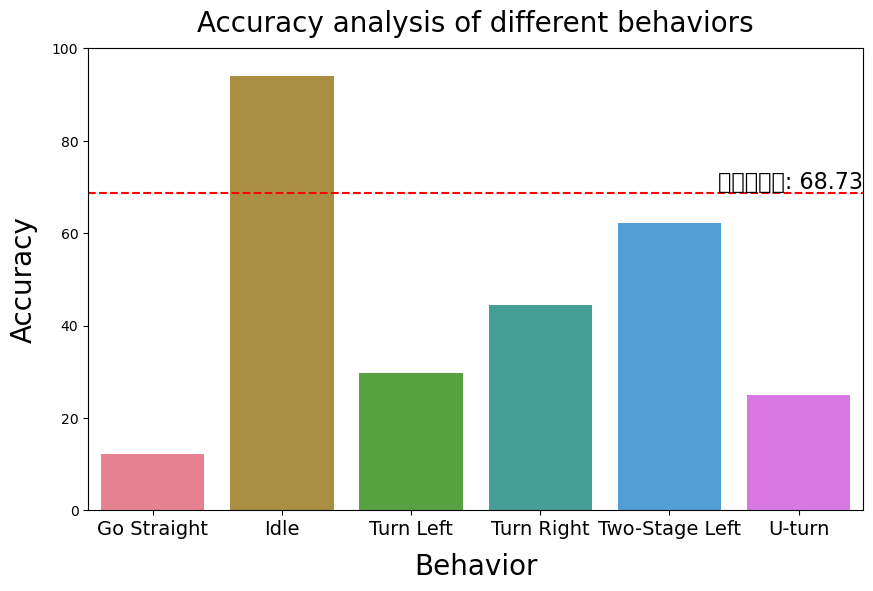

,Action,Predicted: Go Straight,Predicted: Idle,Predicted: Turn Left,Predicted: Turn Right,Predicted: Two-Stage Left,Predicted: U-turn,Accuracy
0,Go Straight,14,24,8,36,0,32,12.280702
1,Idle,0,792,11,11,29,0,93.950178
2,Turn Left,10,10,35,56,0,7,29.661017
3,Turn Right,17,16,79,102,10,5,44.541485
4,Two-Stage Left,0,56,7,5,114,1,62.295082
5,U-turn,0,10,0,0,50,20,25.000000


In [41]:
# 不載入模型方式

# 為了先取得Label比較好比較後續準確度
df = pd.read_csv('Train_Label.csv')
action = df['Action']

feature = ['X-axis Angular Velocity', 'Y-axis Angular Velocity',
       'Z-axis Angular Velocity', 'X-axis Acceleration', 'Y-axis Acceleration',
       'Z-axis Acceleration', 'X-axis Angle', 'Y-axis Angle', 'Z-axis Angle']

# 自動分群，將底層的動作分群，並儲存成'NoneModel_Sample.csv'
AutoTag.cluster_data(df[feature], feature, method="kmeans", n_clusters=11, model_path=None, save_path='NoneModel_Sample.csv')

# 使用剛剛分類完的，並把Label加上去
df = pd.read_csv('NoneModel_Sample.csv') 
df['Action'] = action


DrivePSTs.train_vomm(df, 30, 11, None)

test_df = pd.read_csv('Test_Label.csv')

test_df['Action Element'] = df['Action Element']

DrivePSTs.test_vomm(test_df, 6, 'NoneModel_Sample.csv')


test_df = pd.read_csv('NoneModel_Sample.csv')
print(DrivePSTs.compute_accuracy(test_df, 6, None))
test_df =test_df.dropna()
DrivePSTs.calculate_action_prediction_counts(test_df['Action'], test_df['Filter_Predict'], True)

In [42]:
import pandas as pd
import Ridetrack
else_ = Ridetrack.else_()

In [43]:
else_.Introduction()



       ╔═╗ ╔╦═══╦╗ ╔╦╗ ╔╗╔═══╦═══╗╔╗╔═╦═══╦═══╦═══╦═══╗╔╗
       ║║╚╗║║╔═╗║║ ║║║ ║║║╔══╣╔══╝║║║╔╩╗╔╗╠╗╔╗║╔═╗║╔═╗╠╝║
       ║╔╗╚╝║║ ╚╣╚═╝║║ ║║║╚══╣╚══╗║╚╝╝ ║║║║║║║╠╝╔╝╠╝╔╝╠╗║
       ║║╚╗║║║ ╔╣╔═╗║║ ║║║╔══╣╔══╝║╔╗║ ║║║║║║║║ ║╔╬═╝╔╝║║
       ║║ ║║║╚═╝║║ ║║╚═╝║║╚══╣╚══╗║║║╚╦╝╚╝╠╝╚╝║ ║║║║╚═╦╝╚╗
       ╚╝ ╚═╩═══╩╝ ╚╩═══╝╚═══╩═══╝╚╝╚═╩═══╩═══╝ ╚╝╚═══╩══╝
                  ╔═══╗  ╔╗  ╔════╗       ╔╗
                  ║╔═╗║  ║║  ║╔╗╔╗║       ║║
                  ║╚═╝╠╦═╝╠══╬╝║║╚╬═╦══╦══╣║╔╗
                  ║╔╗╔╬╣╔╗║║═╣ ║║ ║╔╣╔╗║╔═╣╚╝╝
                  ║║║╚╣║╚╝║║═╣ ║║ ║║║╔╗║╚═╣╔╗╗
                  ╚╝╚═╩╩══╩══╝ ╚╝ ╚╝╚╝╚╩══╩╝╚╝
                          ╭━━━┳╮
                          ┃╭━━┫┃
                          ┃╰━━┫┃╭━━┳━━╮
                          ┃╭━━┫┃┃━━┫┃━┫
                          ┃╰━━┫╰╋━━┃┃━┫
                          ╰━━━┻━┻━━┻━━╯

        歡迎使用 RideTrack Else 功能！
        
        這個Class包含以下功能：
        
        1. Tradition_Category: Equal Width Bucketing (輸入分位數)。
        

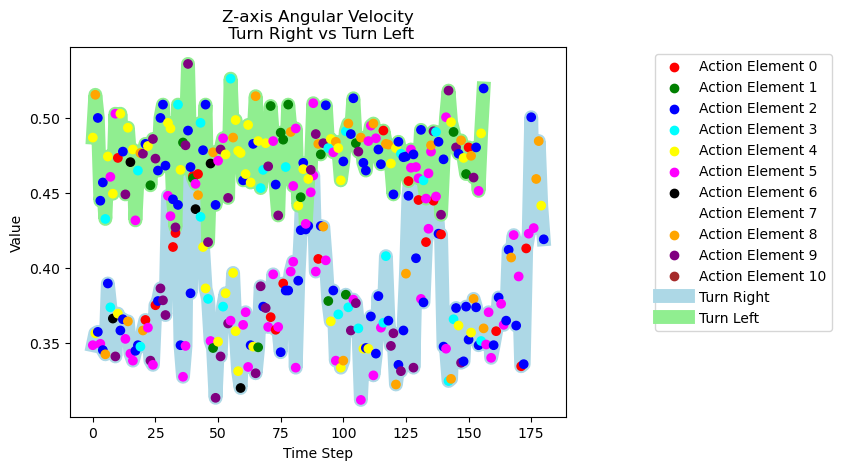

In [44]:
# 為了先取得Label比較好比較後續準確度
df = pd.read_csv('Train_Label.csv')
action = df['Action']

# 使用剛剛分類完的，並把Label加上去
df = pd.read_csv('Sample.csv') 
df['Action'] = action

# 可以繪製出兩種不同的駕駛行為，去觀察它底層的動作組成 (我這邊觀察使用Z-axis Angular Velocity，比較明顯不會擠成一團)
else_.Plot_Action_Cluter(df, 'Turn Right', 'Turn Left', 'Z-axis Angular Velocity', 11, 181, False)

Execution time: 0.0 hours 0.0 minutes 3.0165083408355713 seconds


100%|██████████| 5516/5516 [00:17<00:00, 317.17it/s]


Execution time: 0.0 hours 0.0 minutes 17.585191249847412 seconds
            index       Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  89.086595    14.912281   45.414847    42.5  33.050847   
1  Filter_Predict  94.661922    15.789474   53.711790    40.0  30.508475   

   Two-Stage Left  Accuracy (Total)  
0       59.016393         67.198468  
1       71.038251         72.559030  
| Action         |   Predicted: Go Straight |   Predicted: Idle |   Predicted: Turn Left |   Predicted: Turn Right |   Predicted: Two-Stage Left |   Predicted: U-turn |   Accuracy |
|:---------------|-------------------------:|------------------:|-----------------------:|------------------------:|----------------------------:|--------------------:|-----------:|
| Go Straight    |                       18 |                26 |                      0 |                      22 |                          27 |                  21 |    15.7895 |
| Idle           |                        0 | 

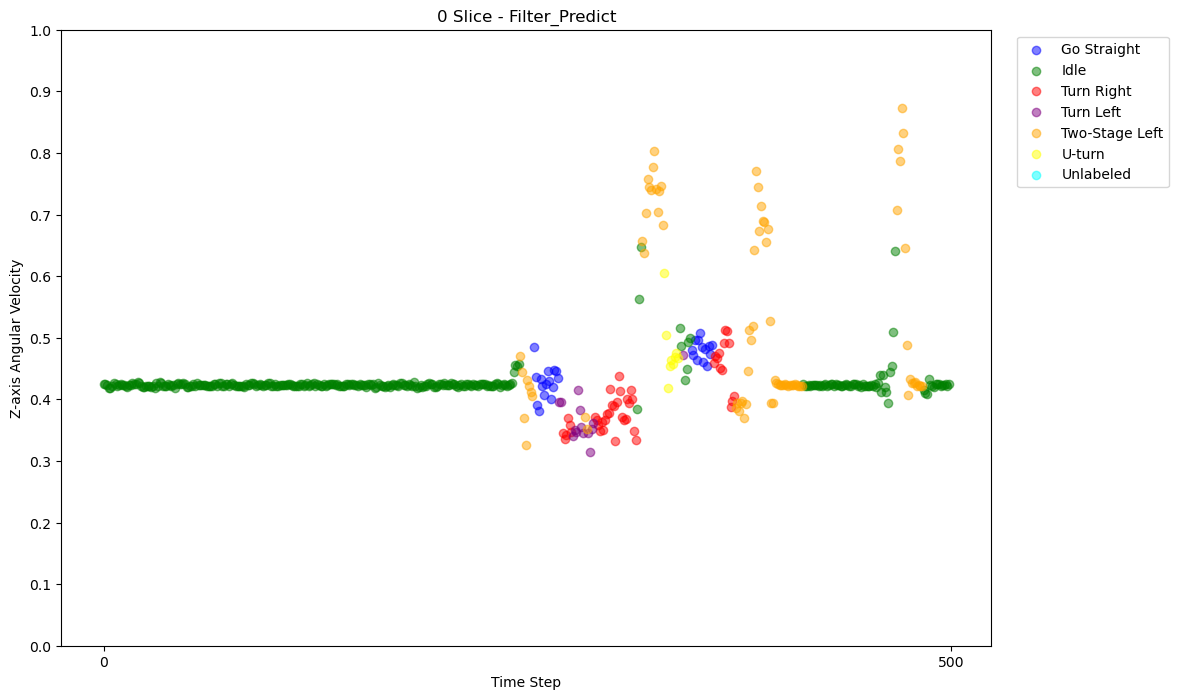

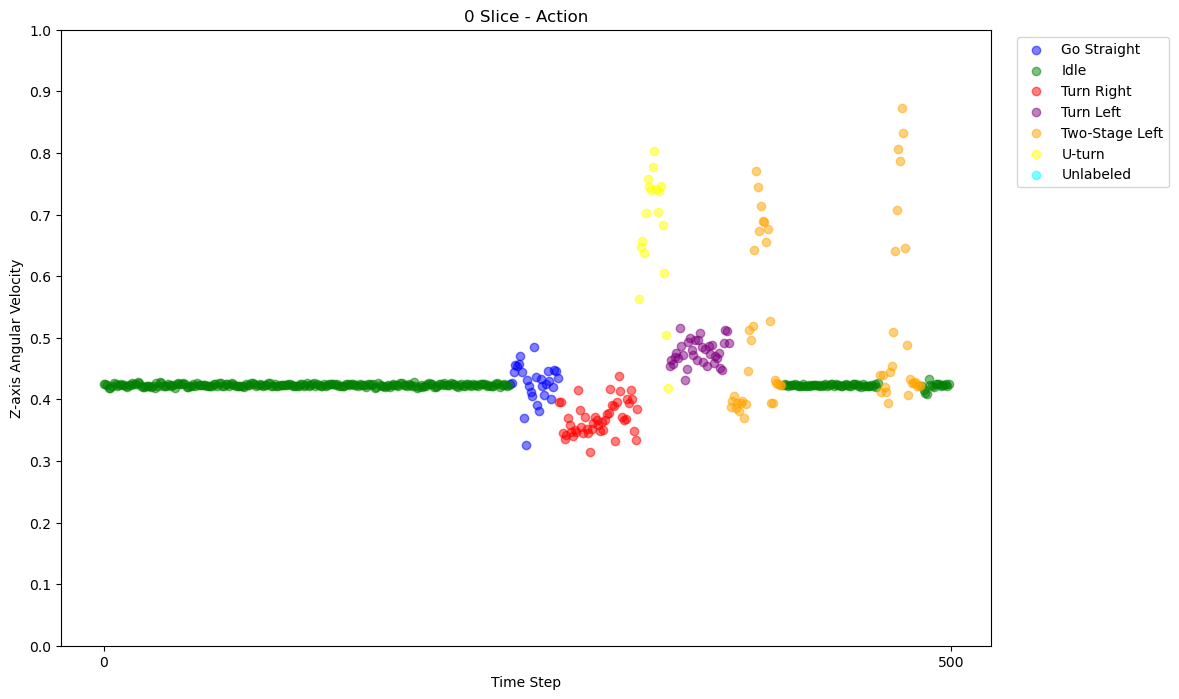

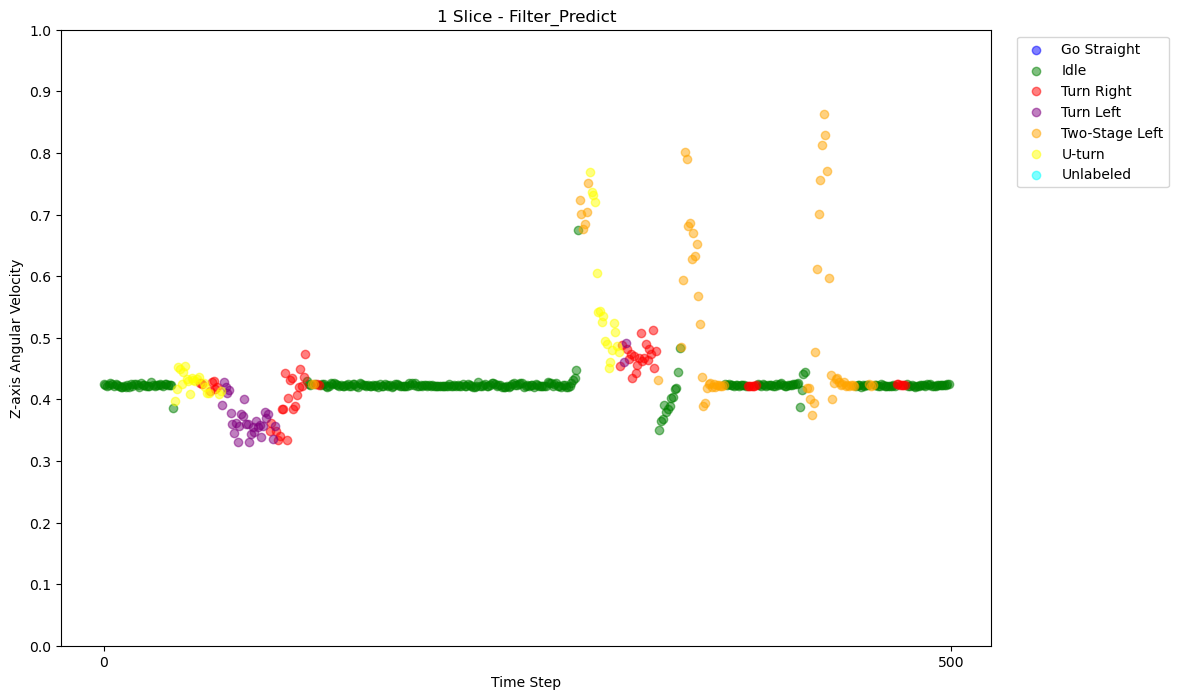

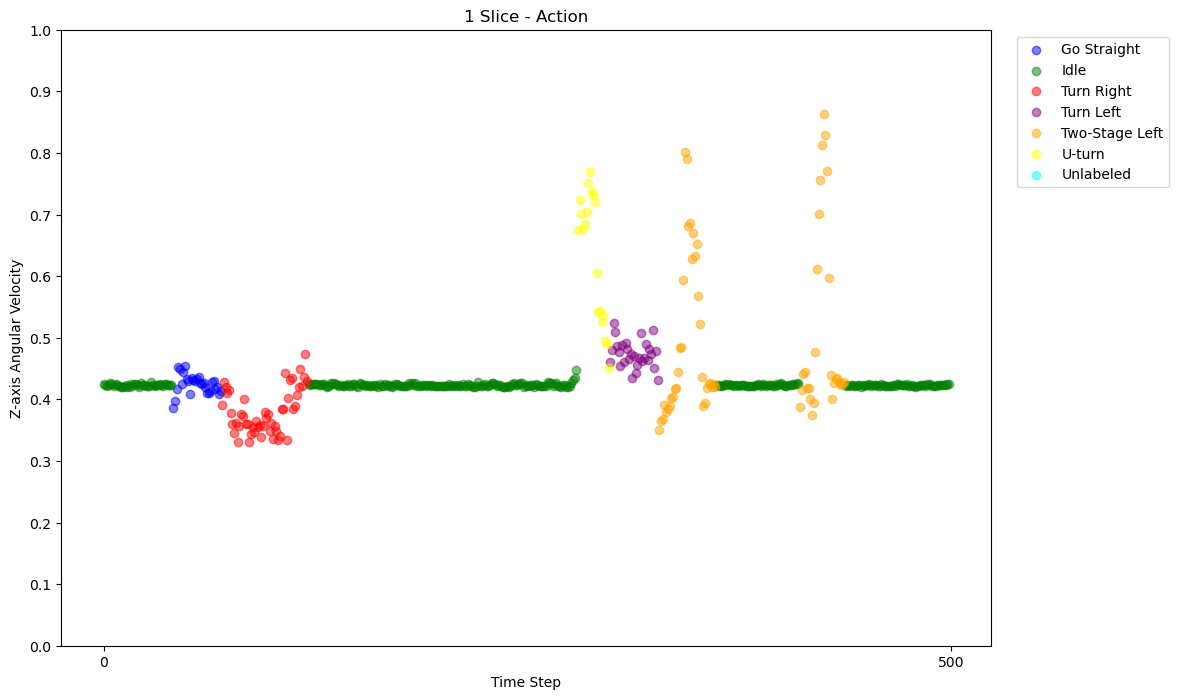

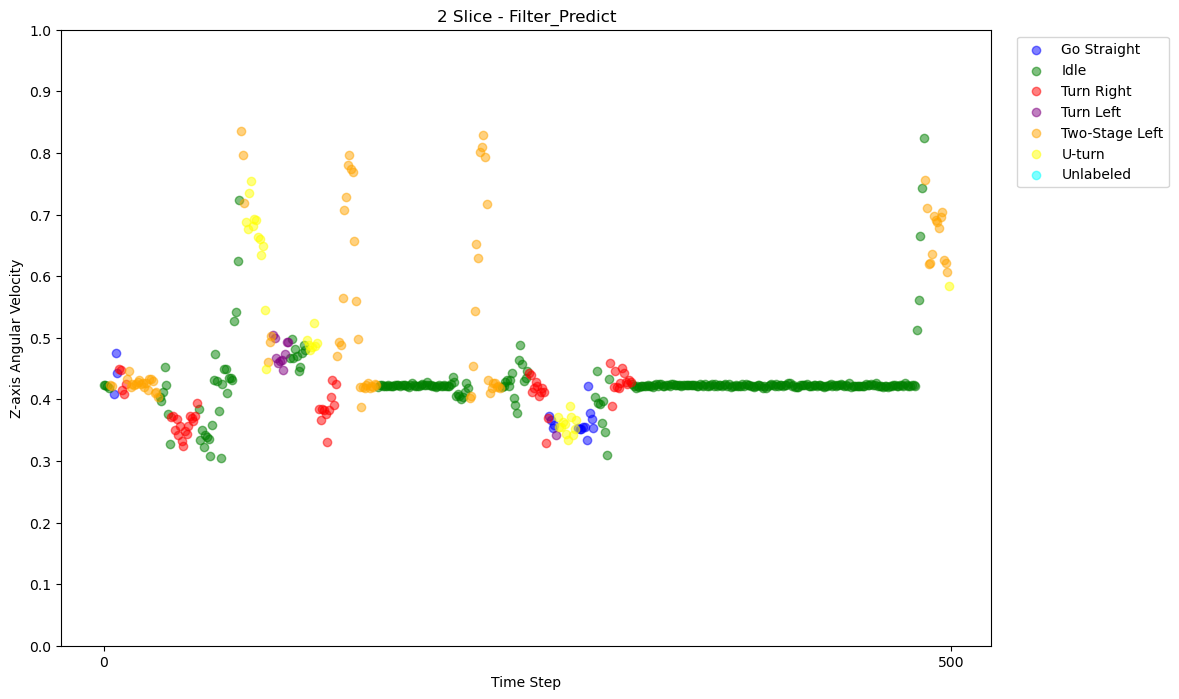

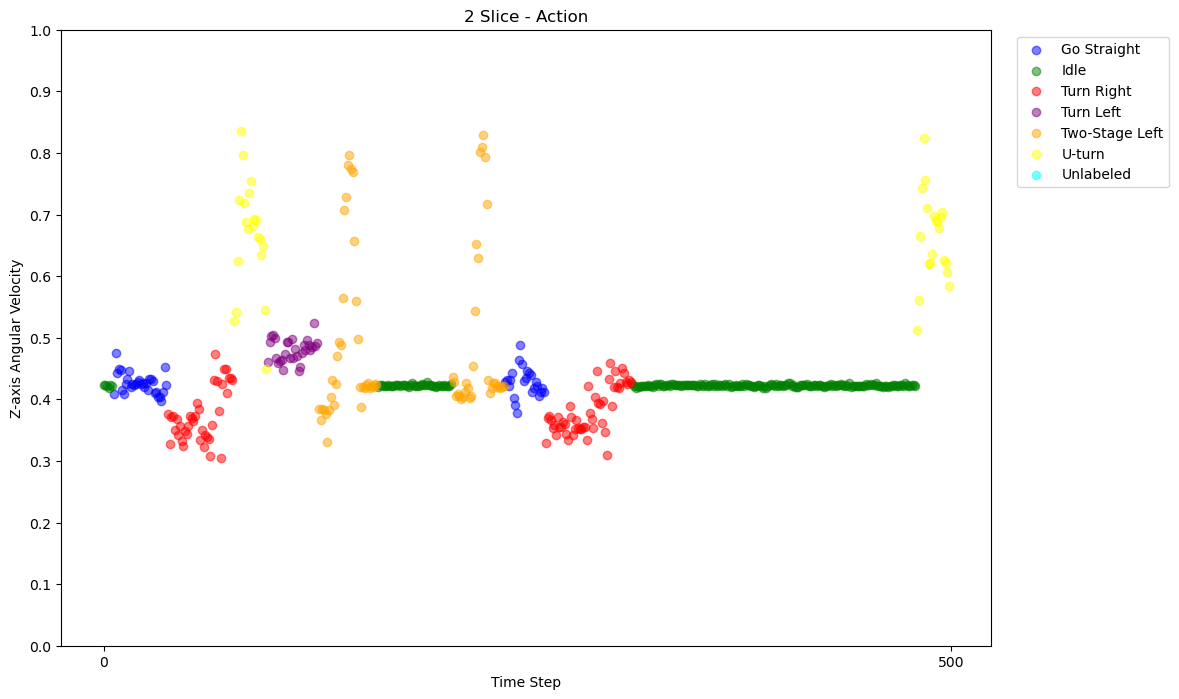

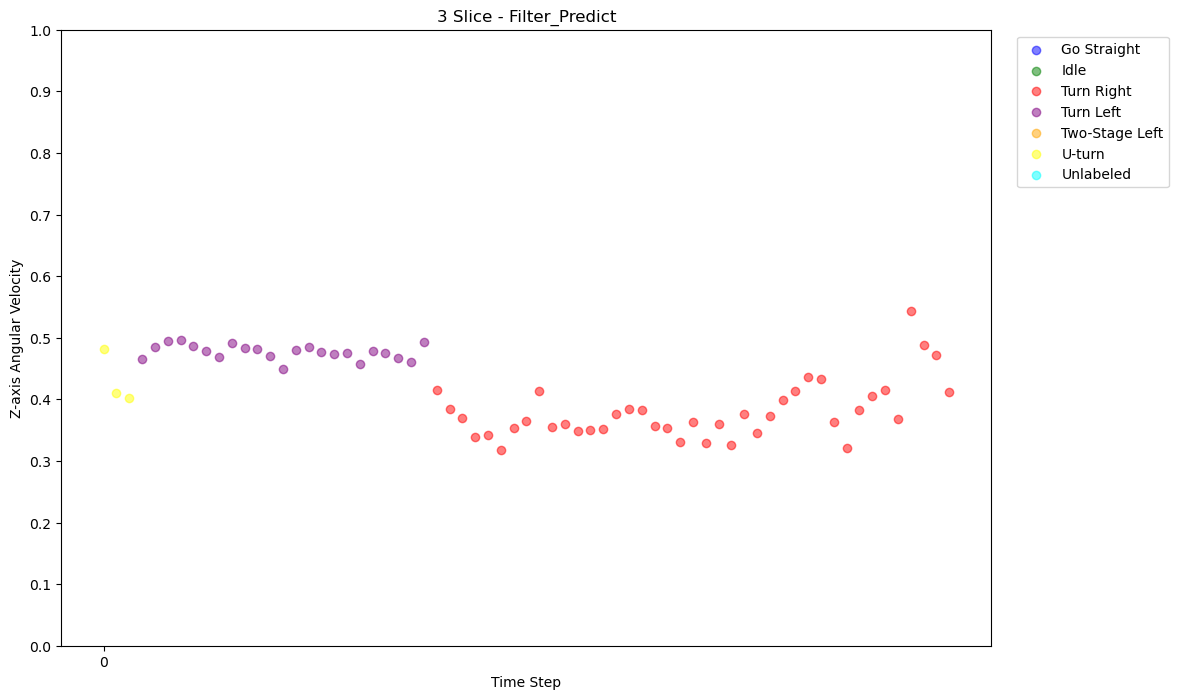

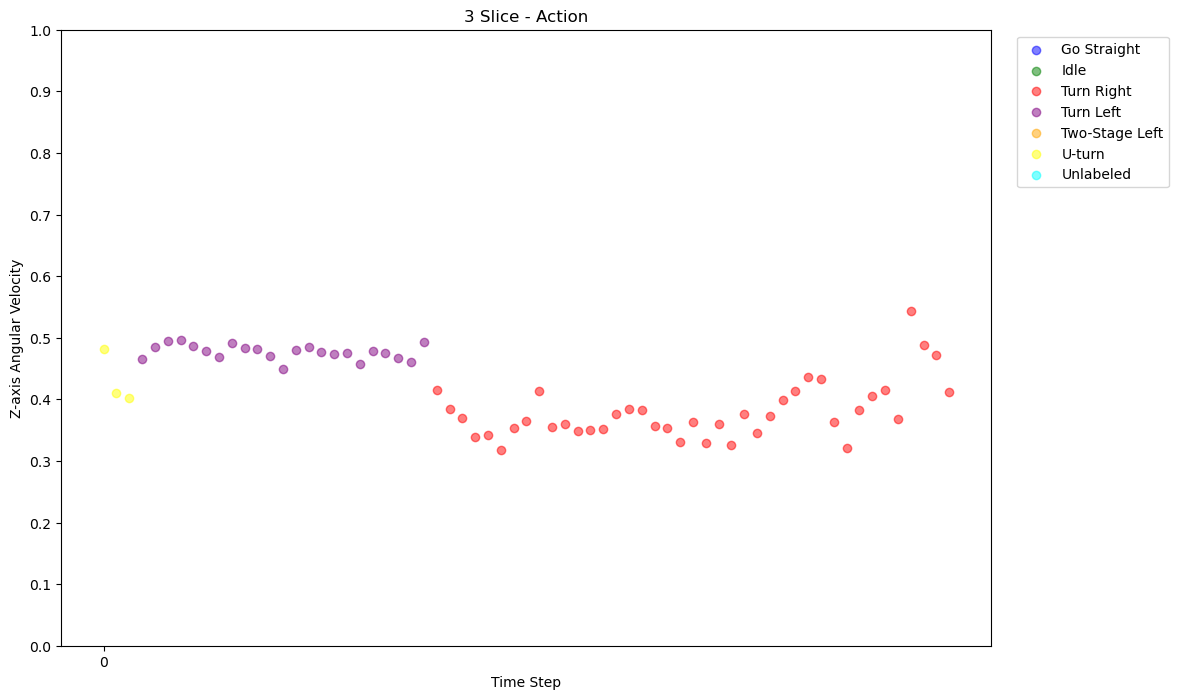

繪製動作序列所花費時間：0小時0分鐘0秒


In [45]:
# 為了繪製圖形，重新跑了一次

# 為了先取得Label比較好比較後續準確度
df = pd.read_csv('Train_Label.csv')
action = df['Action']

# 使用剛剛分類完的，並把Label加上去
df = pd.read_csv('Sample.csv') 
df['Action'] = action


DrivePSTs.train_vomm(df, 30, 11, None)

test_df = pd.read_csv('Test_Label.csv')

test_df['Action Element'] = df['Action Element']

DrivePSTs.test_vomm(test_df, 6, 'NoneModel_Sample.csv')


test_df = pd.read_csv('NoneModel_Sample.csv')
print(DrivePSTs.compute_accuracy(test_df, 6, None))
test_df =test_df.dropna()
DrivePSTs.calculate_action_prediction_counts(test_df['Action'], test_df['Filter_Predict'], False)

# 可以繪製出人工標記以及PST預測的結果
# 奇數張為預測結果，偶數張為人工標記 ，(向下主要是偏右的行為、向上是偏左的行為)
else_.Plot_Action_Track(test_df, 'Filter_Predict', 500, False)

In [46]:
import pandas as pd
import Ridetrack
ComparisonTargets = Ridetrack.ComparisonTargets()

In [47]:
ComparisonTargets.Introduction()



       ╔═╗ ╔╦═══╦╗ ╔╦╗ ╔╗╔═══╦═══╗╔╗╔═╦═══╦═══╦═══╦═══╗╔╗
       ║║╚╗║║╔═╗║║ ║║║ ║║║╔══╣╔══╝║║║╔╩╗╔╗╠╗╔╗║╔═╗║╔═╗╠╝║
       ║╔╗╚╝║║ ╚╣╚═╝║║ ║║║╚══╣╚══╗║╚╝╝ ║║║║║║║╠╝╔╝╠╝╔╝╠╗║
       ║║╚╗║║║ ╔╣╔═╗║║ ║║║╔══╣╔══╝║╔╗║ ║║║║║║║║ ║╔╬═╝╔╝║║
       ║║ ║║║╚═╝║║ ║║╚═╝║║╚══╣╚══╗║║║╚╦╝╚╝╠╝╚╝║ ║║║║╚═╦╝╚╗
       ╚╝ ╚═╩═══╩╝ ╚╩═══╝╚═══╩═══╝╚╝╚═╩═══╩═══╝ ╚╝╚═══╩══╝
                  ╔═══╗  ╔╗  ╔════╗       ╔╗
                  ║╔═╗║  ║║  ║╔╗╔╗║       ║║
                  ║╚═╝╠╦═╝╠══╬╝║║╚╬═╦══╦══╣║╔╗
                  ║╔╗╔╬╣╔╗║║═╣ ║║ ║╔╣╔╗║╔═╣╚╝╝
                  ║║║╚╣║╚╝║║═╣ ║║ ║║║╔╗║╚═╣╔╗╗
                  ╚╝╚═╩╩══╩══╝ ╚╝ ╚╝╚╝╚╩══╩╝╚╝
        ╭━━━╮                      ╭━━━━╮         ╭╮
        ┃╭━╮┃                      ┃╭╮╭╮┃        ╭╯╰╮
        ┃┃ ╰╋━━┳╮╭┳━━┳━━┳━┳┳━━┳━━┳━╋╯┃┃┣┻━┳━┳━━┳━┻╮╭╋━━╮
        ┃┃ ╭┫╭╮┃╰╯┃╭╮┃╭╮┃╭╋┫━━┫╭╮┃╭╮╮┃┃┃╭╮┃╭┫╭╮┃┃━┫┃┃━━┫
        ┃╰━╯┃╰╯┃┃┃┃╰╯┃╭╮┃┃┃┣━━┃╰╯┃┃┃┃┃┃┃╭╮┃┃┃╰╯┃┃━┫╰╋━━┃
        ╰━━━┻━━┻┻┻┫╭━┻╯╰┻╯╰┻━━┻━━┻╯╰╯╰╯╰╯╰┻╯╰━╮┣━━┻━┻━━╯
                  ┃┃               